# <center>LLM - Detect AI Generated Text</center>

This competition challenges participants to develop a machine learning model that can accurately detect **whether an essay was written by a student or an LLM**. The competition dataset comprises a mix of student-written essays and essays generated by a variety of LLMs.

Team Members:

- Bo-Yi, Mao
- (朱誼學)
- (許木羽)
- (張立誠)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

## Data

### File and Field Information
- **{test|train}_essays.csv**
    - `id` - A unique identifier for each essay.
    - `prompt_id` - Identifies the prompt the essay was written in response to.
    - `text` - The essay text itself.
    - `generated` - Whether the essay was written by a student (`0`) or generated by an LLM (`1`). This field is the target and is not present in `test_essays.csv`.
- **train_prompts.csv** - Essays were written in response to information in these fields.
    - `prompt_id` - A unique identifier for each prompt.
    - `prompt_name` - The title of the prompt.
    - `instructions` - The instructions given to students.
    - `source_text` - The text of the article(s) the essays were written in response to, in Markdown format. Significant paragraphs are enumerated by a numeral preceding the paragraph on the same line, as in `0 Paragraph one.\n\n1 Paragraph two.`. Essays sometimes refer to a paragraph by its numeral. Each article is preceded with its title in a heading, like # Title. When an author is indicated, their name will be given in the title after `by`. Not all articles have authors indicated. An article may have subheadings indicated like `## Subheading`.


### Load Data

In [2]:
# check if we're in a kaggle environment, and set the data directory accordingly

DATA_DIR = "/kaggle/input/"
if not os.path.exists(DATA_DIR):
    DATA_DIR = "./data/"

In [3]:
df_train_essays = pd.read_csv(os.path.join(DATA_DIR, "llm-detect-ai-generated-text/train_essays.csv"))
df_test_essays = pd.read_csv(os.path.join(DATA_DIR, "llm-detect-ai-generated-text/test_essays.csv"))

df_train_prompts = pd.read_csv(os.path.join(DATA_DIR, "llm-detect-ai-generated-text/train_prompts.csv"))

In [4]:
df_train_essays[df_train_essays.generated == 0]

,id,prompt_id,text,generated
0,0059830c,0,Cars. Cars have been around since they became ...,0
1,005db917,0,Transportation is a large necessity in most co...,0
2,008f63e3,0,"""America's love affair with it's vehicles seem...",0
3,00940276,0,How often do you ride in a car? Do you drive a...,0
4,00c39458,0,Cars are a wonderful thing. They are perhaps o...,0
...,...,...,...,...
1373,fe6ff9a5,1,There has been a fuss about the Elector Colleg...,0
1374,ff669174,0,Limiting car usage has many advantages. Such a...,0
1375,ffa247e0,0,There's a new trend that has been developing f...,0
1376,ffc237e9,0,As we all know cars are a big part of our soci...,0


,id,prompt_id,text,generated
0,0059830c,0,Cars. Cars have been around since they became ...,0
1,005db917,0,Transportation is a large necessity in most co...,0
2,008f63e3,0,"""America's love affair with it's vehicles seem...",0
3,00940276,0,How often do you ride in a car? Do you drive a...,0
4,00c39458,0,Cars are a wonderful thing. They are perhaps o...,0
...,...,...,...,...
1373,fe6ff9a5,1,There has been a fuss about the Elector Colleg...,0
1374,ff669174,0,Limiting car usage has many advantages. Such a...,0
1375,ffa247e0,0,There's a new trend that has been developing f...,0
1376,ffc237e9,0,As we all know cars are a big part of our soci...,0


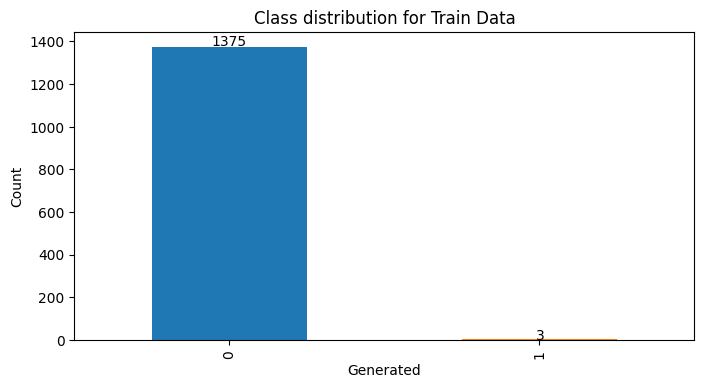

In [5]:
display(df_train_essays)

# Show distribution of answers using bar plot
plt.figure(figsize=(8, 4))
ax = df_train_essays.generated.value_counts().plot.bar(
    color=['tab:blue', 'tab:orange'])
for p in ax.patches:
    ax.annotate(
        str(p.get_height()),
        (p.get_x() * 1.005 + p.get_width() / 2.0, p.get_height() * 1.005),
        ha='center')
plt.xlabel("Generated")
plt.ylabel("Count")
plt.title("Class distribution for Train Data")
plt.show()

### External Data

In [6]:
# ext_df1 = pd.read_csv('/kaggle/input/daigt-proper-train-dataset/train_drcat_04.csv')
ext_df1 = pd.read_csv(os.path.join(
    DATA_DIR, "daigt-proper-train-dataset/train_drcat_04.csv"))

ext_df1 = ext_df1[['essay_id', 'text', 'label', 'source', 'prompt']]
ext_df1.rename(columns={'label': 'generated', 'essay_id': 'id'}, inplace=True)

ext_df1.head()

,id,text,generated,source,prompt
0,E897534557AF,"In recent years, technology has had a profoun...",1,mistral7binstruct_v2,\nTask: Write an essay discussing the positive...
1,DFBA34FFE11D,Should students participate in an extracurricu...,0,persuade_corpus,NaN
2,af37ecf5,The electoral college is a symbol of mockery a...,0,train_essays,NaN
3,5EC2696BAD78,This is why I think the principle should allow...,0,persuade_corpus,NaN
4,llama_70b_v1843,I strongly believe that meditation and mindful...,1,llama_70b_v1,Some schools have implemented meditation and m...


In [7]:
# ArguGPT is a dataset of argumentative essays generated by various models. i.e. all the essays are generated.
ext_df2 = pd.read_csv(os.path.join(DATA_DIR, "argugpt/argugpt.csv"))

ext_df2['generated'] = 1
ext_df2 = ext_df2[['id', 'text', 'generated', 'model', 'prompt']]
ext_df2.rename(columns={'model': 'source'}, inplace=True)

ext_df2.head()

,id,text,generated,source,prompt
0,weccl_30,There are many people who think that universit...,1,text-babbage-001,Some people think the university education is ...
1,weccl_51,There are a number of reasons why people might...,1,text-babbage-001,Some people think the university education is ...
2,weccl_48,There are many reasons why university educatio...,1,text-babbage-001,Some people think the university education is ...
3,weccl_50,There are many people who think that universit...,1,text-babbage-001,Some people think the university education is ...
4,weccl_55,There is a general consensus that university e...,1,text-babbage-001,Some people think the university education is ...


### Combine Data

In [8]:
df_train_essays = pd.concat([
    df_train_essays,
    ext_df1,
    ext_df2
], ignore_index=True)

,id,prompt_id,text,generated,source,prompt
0,0059830c,0.0,Cars. Cars have been around since they became ...,0,NaN,NaN
1,005db917,0.0,Transportation is a large necessity in most co...,0,NaN,NaN
2,008f63e3,0.0,"""America's love affair with it's vehicles seem...",0,NaN,NaN
3,00940276,0.0,How often do you ride in a car? Do you drive a...,0,NaN,NaN
4,00c39458,0.0,Cars are a wonderful thing. They are perhaps o...,0,NaN,NaN
...,...,...,...,...,...,...
49617,gre_514,NaN,The notion that one must be forced to defend a...,1,text-davinci-003,Only by being forced to defend an idea against...
49618,gre_1107,NaN,I strongly agree with the statement that menta...,1,gpt-3.5-turbo,Students should be encouraged to realize that ...
49619,gre_1163,NaN,"In today’s world, where competition is highly ...",1,gpt-3.5-turbo,The best preparation for life or a career is n...
49620,gre_1174,NaN,Education is one of the most powerful tools th...,1,gpt-3.5-turbo,AII nations should help support the developmen...


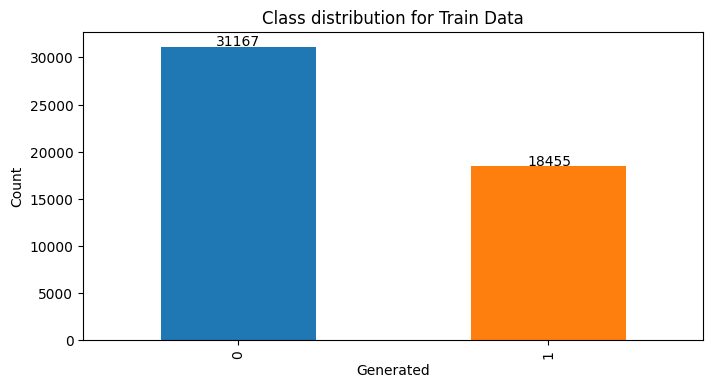

In [9]:
display(df_train_essays)

# Show distribution of answers using bar plot
plt.figure(figsize=(8, 4))
ax = df_train_essays.generated.value_counts().plot.bar(
    color=['tab:blue', 'tab:orange'])
for p in ax.patches:
    ax.annotate(
        str(p.get_height()),
        (p.get_x() * 1.005 + p.get_width() / 2.0, p.get_height() * 1.005),
        ha='center')
plt.xlabel("Generated")
plt.ylabel("Count")
plt.title("Class distribution for Train Data")
plt.show()

## Citation
Jules King, Perpetual Baffour, Scott Crossley, Ryan Holbrook, and Maggie Demkin. LLM - Detect AI Generated Text. https://kaggle.com/competitions/llm-detect-ai-generated-text, 2023. Kaggle.